In [1]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas
from scipy import stats
from numpy import matlib
import matplotlib.path as mpath
import matplotlib.ticker as mticker 
import cartopy.crs as ccrs
import cartopy.feature as cf
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import mlab
from scipy import integrate

## Read FOCI-MOZ

In [2]:
%cd -b sw054
sw054 = xr.open_dataset('FOCI1.4-SW054_TEM_PSI_V_W_F_divF_1958-2013_daily.nc', decode_times=True)
sw054_heat = xr.open_dataset('FOCI1.4-SW054_echam6_echam_1958-2013_v_za_st_za_prod_zm.nc', decode_times=True)
%cd -b sw064
sw064 = xr.open_dataset('FOCI1.4-sw064_TEM_PSI_V_W_F_divF_1958-2013_daily.nc', decode_times=True)
sw064_heat = xr.open_dataset('FOCI1.4-SW064_echam6_echam_1958-2013_v_za_st_za_prod_zm.nc', decode_times=True)
%cd -b sw065
sw065 = xr.open_dataset('FOCI1.4-sw065_TEM_PSI_V_W_F_divF_1958-2013_daily.nc', decode_times=True)
sw065_heat = xr.open_dataset('FOCI1.4-SW065_echam6_echam_1958-2013_v_za_st_za_prod_zm.nc', decode_times=True)

(bookmark:sw054) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


## Read FOCI-HIST

In [3]:
%cd -b sw060
sw060 = xr.open_dataset('FOCI1.7-sw060_TEM_PSI_V_W_F_divF_1958-2013_daily.nc', decode_times=True)
sw060_heat = xr.open_dataset('FOCI1.7-SW060_echam6_echam_1958-2013_v_za_st_za_prod_zm.nc', decode_times=True)
%cd -b sw061
sw061 = xr.open_dataset('FOCI1.7-sw061_TEM_PSI_V_W_F_divF_1958-2013_daily.nc', decode_times=True)
sw061_heat = xr.open_dataset('FOCI1.7-SW061_echam6_echam_1958-2013_v_za_st_za_prod_zm.nc', decode_times=True)
%cd -b jh019
jh019 = xr.open_dataset('FOCI1.9.4-jh019_TEM_PSI_V_W_F_divF_1958-2013_daily.nc', decode_times=True)
jh019_heat = xr.open_dataset('FOCI1.9.4-JH019_echam6_echam_1958-2013_v_za_st_za_prod_zm.nc', decode_times=True)

(bookmark:sw060) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
(bookmark:sw061) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
(bookmark:jh019) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6


In [4]:
def ii_sel_months(data):
    #----------------------------------------select each calendar month and average over it for each year----------------------------------
    # Input: data = xarray containing the data
    # Output: an array with yearly timeseries for each month
    # Author: Ioana Ivanciu (27.10.2018)
    #------------------------------------------------------------------------------------------------------------------------------
    
    import xarray as xr
    
    # Define boolean masks for each month
    def is_jan(month):
        return month==1 # returns an array with true where the month is in Jan and false elswhere
    def is_feb(month):
        return month==2
    def is_mar(month):
        return month==3
    def is_apr(month):
        return month==4
    def is_may(month):
        return month==5
    def is_jun(month):
        return month==6
    def is_jul(month):
        return month==7
    def is_aug(month):
        return month==8
    def is_sep(month):
        return month==9
    def is_oct(month):
        return month==10
    def is_nov(month):
        return month==11
    def is_dec(month):
        return month==12
    
    
    # Select each mon and average it over each year
    data_jan = data.sel(time=is_jan(data['time.month'])).groupby('time.year').mean(dim='time')
    data_feb = data.sel(time=is_feb(data['time.month'])).groupby('time.year').mean(dim='time')
    data_mar = data.sel(time=is_mar(data['time.month'])).groupby('time.year').mean(dim='time')
    data_apr = data.sel(time=is_apr(data['time.month'])).groupby('time.year').mean(dim='time')
    data_may = data.sel(time=is_may(data['time.month'])).groupby('time.year').mean(dim='time')
    data_jun = data.sel(time=is_jun(data['time.month'])).groupby('time.year').mean(dim='time')
    data_jul = data.sel(time=is_jul(data['time.month'])).groupby('time.year').mean(dim='time')
    data_aug = data.sel(time=is_aug(data['time.month'])).groupby('time.year').mean(dim='time')
    data_sep = data.sel(time=is_sep(data['time.month'])).groupby('time.year').mean(dim='time')
    data_oct = data.sel(time=is_oct(data['time.month'])).groupby('time.year').mean(dim='time')
    data_nov = data.sel(time=is_nov(data['time.month'])).groupby('time.year').mean(dim='time')
    data_dec = data.sel(time=is_dec(data['time.month'])).groupby('time.year').mean(dim='time')
    
    data_mon = xr.concat([data_jan, data_feb, data_mar, data_apr, data_may, data_jun, data_jul, data_aug, data_sep, data_oct, data_nov, data_dec], 'month')
    
    return data_mon

In [5]:
def mann_kendall_lat(data):
    
    time = data.year
    mon = np.arange(1,13)
    plev = data.plev
    lat = data.lat
    trend = xr.DataArray(np.zeros((len(mon), len(plev), len(lat))), dims=['month', 'plev', 'lat'], coords = [mon, plev, lat])
    
    for i in range(0, len(time)-1):
        val = data.sel(year=time[i]) # select each value in the array
        sign = xr.where(data>val, 1, 2) # put 1 where following values are greater than val
        sign = xr.where(data<val, -1, sign) # put -1 where following values are smaller than val
        sign = xr.where(data==val, 0, sign) # put 0 where following values are equal to val
        trend = trend + sign[:,i+1::,:,:].sum(dim='year')
        no_equal = sign.where(sign==0).count(dim='year')-1
    
    # Compute the variance
    var = 1/18*(len(time)*(len(time)-1)*(2*len(time)+5))
    
    # Compute the normalized test statistic
    z = xr.where(trend>0, (trend-1)/np.sqrt(var), 0)
    z = xr.where(trend<0, (trend+1)/np.sqrt(var), z)
    
    # Compute the probability associated with the test statistic
    p = 1/np.sqrt(2*np.pi)*np.exp(z**2/(-2))
    
    # Form array with 1 where the trend is significant and 0 elsewhere
    signif = xr.where(p<0.05, 1, 0)
    
    return signif

In [12]:
def ii_mon_trend_lat_plev(data):
    
    data = data.sel(time=slice('1958-01-01', '2002-12-31'))
        
    # Select months 
    monthly = ii_sel_months(data)    
    
    # Compute the linear trend using least squares method
    def calc_trend(data):
        time = data.year
        mon = np.arange(1,13)
        t = np.arange(1,len(time)+1)
        trend = np.zeros((len(mon), len(data.plev), len(data.lat)))
        for i in range(0, len(data.plev)):
            for j in range(0, len(data.lat)):
                for k in range(0, len(mon)):
                    trend[k,i,j], _, _, _, _ = stats.linregress(t, data[k,:,i,j].values) # linear regression of x from time
            
        trend = xr.DataArray(trend*10, dims=['month', 'plev', 'lat'], coords=[mon, data.plev, data.lat]) # trend per decade
        
        return trend

    trend = calc_trend(monthly)
    
    # Check the significance using the Mann-Kendall test
    sig = mann_kendall_lat(monthly) #1 where the trend is significant and 0 elsewhere
    
    signif = xr.where(sig==1, trend, np.nan)
    #non_sig = xr.where(sig==0, 1, np.nan)
    
    # Compute the time mean for each month
    mean = monthly.mean(dim='year')
    
    return trend, signif, mean

In [7]:
def ens_trend_lat_plev(data1, data2, data3):
    
    data1 = data1.sel(time=slice('1958-01-01', '2002-12-31'))
    data2 = data2.sel(time=slice('1958-01-01', '2002-12-31'))
    data3 = data3.sel(time=slice('1958-01-01', '2002-12-31'))
    
    # Compute the ensemble mean
    ens = xr.concat((data1, data2, data3), dim='exp').mean(dim='exp')
    
    # Compute the ensemble mean trend and its significance
    trend, signif, mean = ii_mon_trend_lat_plev(ens)
    
    return trend, signif, mean

In [8]:
moz_w_trend, moz_w_signif, moz_w_mean = ens_trend_lat_plev(sw054.ws, sw064.ws, sw065.ws)
hist_w_trend, hist_w_signif, hist_w_mean = ens_trend_lat_plev(sw060.ws, sw061.ws, jh019.ws)

In [9]:
moz_v_trend, moz_v_signif, moz_v_mean = ens_trend_lat_plev(sw054.vs, sw064.vs, sw065.vs)
hist_v_trend, hist_v_signif, hist_v_mean = ens_trend_lat_plev(sw060.vs, sw061.vs, jh019.vs)

In [10]:
moz_ep_trend, moz_ep_signif, moz_ep_mean = ens_trend_lat_plev(sw054.div_F, sw064.div_F, sw065.div_F)
hist_ep_trend, hist_ep_signif, hist_ep_mean = ens_trend_lat_plev(sw060.div_F, sw061.div_F, jh019.div_F)

In [11]:
moz_ehf_trend, moz_ehf_signif, moz_ehf_mean = ens_trend_lat_plev(sw054_heat.v.squeeze(), sw064_heat.v.squeeze(), sw065_heat.v.squeeze())
hist_ehf_trend, hist_ehf_signif, hist_ehf_mean = ens_trend_lat_plev(sw060_heat.v.squeeze(), sw061_heat.v.squeeze(), jh019_heat.v.squeeze())

In [14]:
def lat_pres_strat8(data, sign, mean, cont, cont2, title, xlab, ylab, n):
   
    plt.subplot(2,4,n)
    con = plt.contourf(data.lat, data.plev/100, data, cont, cmap='RdBu_r', extend='both', hatches=['.'])
    con = plt.contourf(data.lat, data.plev/100, sign, cont, cmap='RdBu_r', extend='both')
    cs = plt.contour(data.lat, data.plev/100, mean, cont2, colors='k')
    plt.clabel(cs, fmt= '%1.0f', fontsize=20, inline=1)
    plt.xlim(data.lat.min(), 0)
    plt.ylim(1, 200)
    ax=plt.gca()
    ax.invert_yaxis()
    ax.set_yscale('log')
    plt.xticks([-60,-30,0])
    plt.yticks([1, 2, 5, 10, 20, 50, 100, 200],
               ('1', '2', '5', '10', '20', '50', '100', '200'))
    ax.tick_params(axis='both', labelsize=24)
    ax.minorticks_on()
    plt.xlabel(xlab, fontsize=24)
    plt.ylabel(ylab, fontsize=30) 
    plt.title(title, fontsize=30)

    return con

In [15]:
def lat_pres_strat82(data, sign, mean, cont, cont2, title, xlab, ylab, n):
   
    plt.subplot(2,4,n)
    con = plt.contourf(data.lat, data.plev/100, data, cont, cmap='RdBu_r', extend='both', hatches=['.'])
    con = plt.contourf(data.lat, data.plev/100, sign, cont, cmap='RdBu_r', extend='both')
    cs = plt.contour(data.lat, data.plev/100, mean, cont2, colors='k')
    plt.clabel(cs, fmt= '%1.0f', fontsize=20, inline=1)
    plt.xlim(data.lat.min(), 0)
    plt.ylim(1, 200)
    ax=plt.gca()
    ax.invert_yaxis()
    ax.set_yscale('log')
    plt.xticks([-60,-30,0])
    plt.yticks([1, 2, 5, 10, 20, 50, 100, 200],
               ())
    ax.tick_params(axis='both', labelsize=24)
    ax.minorticks_on()
    plt.xlabel(xlab, fontsize=24)
    plt.ylabel(ylab, fontsize=30) 
    plt.title(title, fontsize=30)

    return con

In [16]:
def lat_pres_strat83(data, sign, mean, cont, cont2, title, xlab, ylab, n):
   
    plt.subplot(2,4,n)
    con = plt.contourf(data.lat, data.plev/100, data, cont, cmap='RdBu_r', extend='both', hatches=['.'])
    con = plt.contourf(data.lat, data.plev/100, sign, cont, cmap='RdBu_r', extend='both')
    cs = plt.contour(data.lat, data.plev/100, mean, cont2, colors='k')
    plt.clabel(cs, fmt= '%1.1f', fontsize=20, inline=1)
    plt.xlim(data.lat.min(), 0)
    plt.ylim(1, 200)
    ax=plt.gca()
    ax.invert_yaxis()
    ax.set_yscale('log')
    plt.xticks([-60,-30,0])
    plt.yticks([1, 2, 5, 10, 20, 50, 100, 200],
               ())
    ax.tick_params(axis='both', labelsize=24)
    ax.minorticks_on()
    plt.xlabel(xlab, fontsize=24)
    plt.ylabel(ylab, fontsize=30) 
    plt.title(title, fontsize=30)

    return con

## November

Text(-110, 0.7, '(h)')

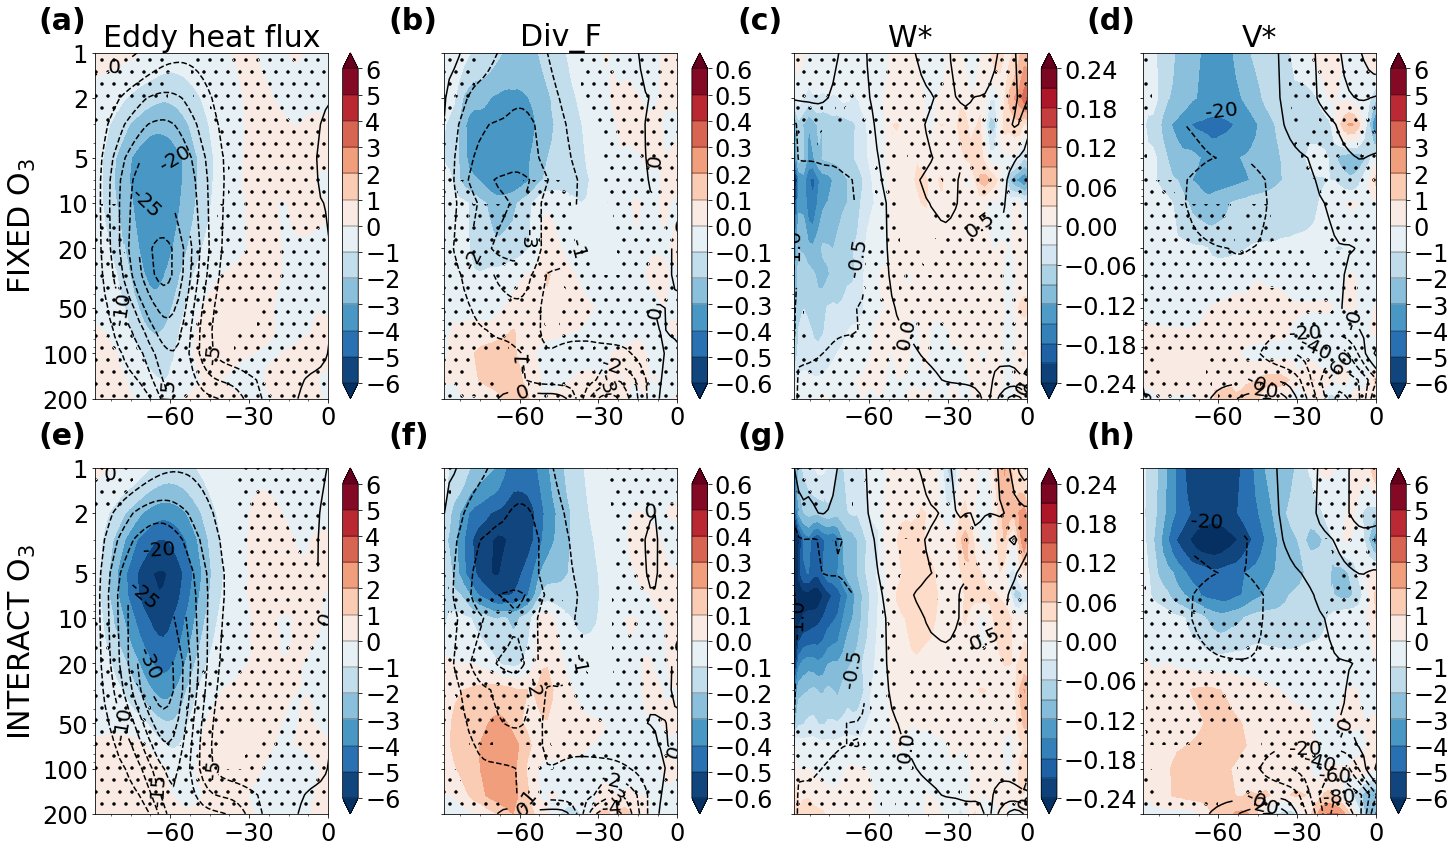

In [23]:
fig = plt.figure(figsize=(24,14))

# Eddy heat flux 
cont=np.arange(-6,6.1,1)
cont2 = np.concatenate((np.arange(-300, -49, 50), np.arange(-30,0,5), np.arange(0,30.1,5), np.arange(50, 300.1, 50)))
ticks = np.arange(-6,6.1,1)
con = lat_pres_strat8(hist_ehf_trend[10,:,:].sel(plev=slice(20000,100)), hist_ehf_signif[10,:,:].sel(plev=slice(20000,100)), \
                      hist_ehf_mean[10,:,:].sel(plev=slice(20000,100)), cont, cont2, 'Eddy heat flux', '', 'FIXED O$_3$', 1)  
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=24)
plt.text(-110, 0.7, '(a)', fontweight='bold', fontsize=30)

cont=np.arange(-6,6.1,1)
cont2 = np.concatenate((np.arange(-300, -49, 50), np.arange(-30,0,5), np.arange(0,30.1,5), np.arange(50, 300.1, 50)))
ticks = np.arange(-6,6.1,1)
con = lat_pres_strat8(moz_ehf_trend[10,:,:].sel(plev=slice(20000,100)), moz_ehf_signif[10,:,:].sel(plev=slice(20000,100)), \
                      moz_ehf_mean[10,:,:].sel(plev=slice(20000,100)), cont, cont2, '', '', 'INTERACT O$_3$', 5)  
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=24)
plt.text(-110, 0.7, '(e)', fontweight='bold', fontsize=30)

# EP flux divergence
cont=np.arange(-0.6,0.61,0.1)
cont2 = np.arange(-5,5.1,1)
ticks = np.arange(-0.6,0.61,0.1)
con = lat_pres_strat82(hist_ep_trend[10,:,:].sel(plev=slice(20000,100)), hist_ep_signif[10,:,:].sel(plev=slice(20000,100)), \
                       hist_ep_mean[10,:,:].sel(plev=slice(20000,100)), cont, cont2, 'Div_F', '', '', 2)  
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=24)
plt.text(-110, 0.7, '(b)', fontweight='bold', fontsize=30)

cont=np.arange(-0.6,0.61,0.1)
cont2 = np.arange(-5,5.1,1)
ticks = np.arange(-0.6,0.61,0.1)
con = lat_pres_strat82(moz_ep_trend[10,:,:].sel(plev=slice(20000,100)), moz_ep_signif[10,:,:].sel(plev=slice(20000,100)), \
                       moz_ep_mean[10,:,:].sel(plev=slice(20000,100)), cont, cont2, '', '', '', 6)  
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=24)
plt.text(-110, 0.7, '(f)', fontweight='bold', fontsize=30)

# W* Units 10^4 m/s
cont=np.arange(-0.24,0.25,0.03)
cont2 = np.concatenate((np.arange(-3,0,0.5), np.arange(0,3.1,0.5)))
ticks = np.arange(-0.24,0.25,0.06)
con = lat_pres_strat83(hist_w_trend[10,:,:].sel(plev=slice(20000,100))*1000, hist_w_signif[10,:,:].sel(plev=slice(20000,100))*1000, \
                       hist_w_mean[10,:,:].sel(plev=slice(20000,100))*1000, cont, cont2, 'W*', '', '', 3)  
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=24)
plt.text(-110, 0.7, '(c)', fontweight='bold', fontsize=30)

cont=np.arange(-0.24,0.25,0.03)
cont2 = np.concatenate((np.arange(-3,0,0.5), np.arange(0,3.1,0.5)))
ticks = np.arange(-0.24,0.25,0.06)
con = lat_pres_strat83(moz_w_trend[10,:,:].sel(plev=slice(20000,100))*1000, moz_w_signif[10,:,:].sel(plev=slice(20000,100))*1000, \
                       moz_w_mean[10,:,:].sel(plev=slice(20000,100))*1000, cont, cont2, '', '', '', 7)  
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=24)
plt.text(-110, 0.7, '(g)', fontweight='bold', fontsize=30)

# V* ! Units 10^2 m/s
cont=np.arange(-0.06,0.061,0.01)*100
cont2 = np.arange(-2,2.1,0.2)*100
ticks = np.arange(-0.06,0.061,0.01)*100
con = lat_pres_strat82(hist_v_trend[10,:,:].sel(plev=slice(20000,100))*100, hist_v_signif[10,:,:].sel(plev=slice(20000,100))*100, \
                       hist_v_mean[10,:,:].sel(plev=slice(20000,100))*100, cont, cont2, 'V*', '', '', 4)  
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=24)
plt.text(-110, 0.7, '(d)', fontweight='bold', fontsize=30)

cont=np.arange(-0.06,0.061,0.01)*100
cont2 = np.arange(-2,2.1,0.2)*100
ticks = np.arange(-0.06,0.061,0.01)*100
con = lat_pres_strat82(moz_v_trend[10,:,:].sel(plev=slice(20000,100))*100, moz_v_signif[10,:,:].sel(plev=slice(20000,100))*100, \
                       moz_v_mean[10,:,:].sel(plev=slice(20000,100))*100, cont, cont2, '', '', '', 8)  
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=24)
plt.text(-110, 0.7, '(h)', fontweight='bold', fontsize=30)